# Introduction

Hi, my name is Jan Verschueren and I'm a student of the minor Big Data and Design at the Hogeschool Utrecht in Utrecht. In this notebook I will go through the steps of data cleaning and a predictive model with the K-nearest neighbor algorithm. I will explain every step and I used the data of employee attrition from IBM.

# Week 3

## Step 1: Data cleaning

### Step 1.1: Import libaries and load dataset in

In [60]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data
df = pd.read_csv(r'D:\Projects\Week3\IBM.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Explanation:
Here i'm importing the necessary libaries, so i can use pandas, seaborn and matplotlib. Next i'm storing the pandas read function in a variable/dataframe (df) in order to work with this dataset in Python. In the left hand corner you will see that this dataframe has 35 columns. In the next steps we have to choose 7 columns with nummurical values in it, including attrition. Lastly with "print(df.head())" I showed the first 5 rows of the dataframe.

### Step 1.2: Make a subset

In [61]:
df = df.loc[:,["Attrition","TotalWorkingYears", "Age", "YearsInCurrentRole", "YearsAtCompany", "YearsWithCurrManager", "YearsSinceLastPromotion"]]
df.head()

,Attrition,TotalWorkingYears,Age,YearsInCurrentRole,YearsAtCompany,YearsWithCurrManager,YearsSinceLastPromotion
0,Yes,8,41,4,6,5,0
1,No,10,49,7,10,7,1
2,Yes,7,37,0,0,0,0
3,No,8,33,7,8,0,3
4,No,6,27,2,2,2,2


#### Explanation:
With the .iloc[] function I made a subset of the 7 columns I think have the strongest correlation with each other based on the knowledge I gained. In the next steps I will make the dataframe ready to do some exploratory data analysis with it.

### Step 1.3: Get rid of rows with empty cells and count the values

In [62]:
df= df.dropna() #get rid of rows with empty cells
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### Explanation:
With the .dropna() function I got rid of the empty cells in the dataframe and with the .value_counts() that I gave to the column 'Attrition', I counted how many times the values 'No' and 'Yes' appeared in this column. 1233 times no and 237 times yes is the outcome of this. that means that 237 times a employee went to another company.

### Step 1.4: Replace categorical values with nummerical values

In [63]:
df['Attrition'].replace(['Yes', 'No'], [0,1], inplace=True) 
df.head()

,Attrition,TotalWorkingYears,Age,YearsInCurrentRole,YearsAtCompany,YearsWithCurrManager,YearsSinceLastPromotion
0,0,8,41,4,6,5,0
1,1,10,49,7,10,7,1
2,0,7,37,0,0,0,0
3,1,8,33,7,8,0,3
4,1,6,27,2,2,2,2


#### Explanation:
With the .replace() function I got rid of the 'Yes' and 'No' in the 'Attrition' column. That is the last step before the analysis. I have to make the values nummerical, otherwise it can't be processed in the plots and predictive model.

## Step 2: Exploratory data analysis

### Step 2.1: Make another subset for the pairplot

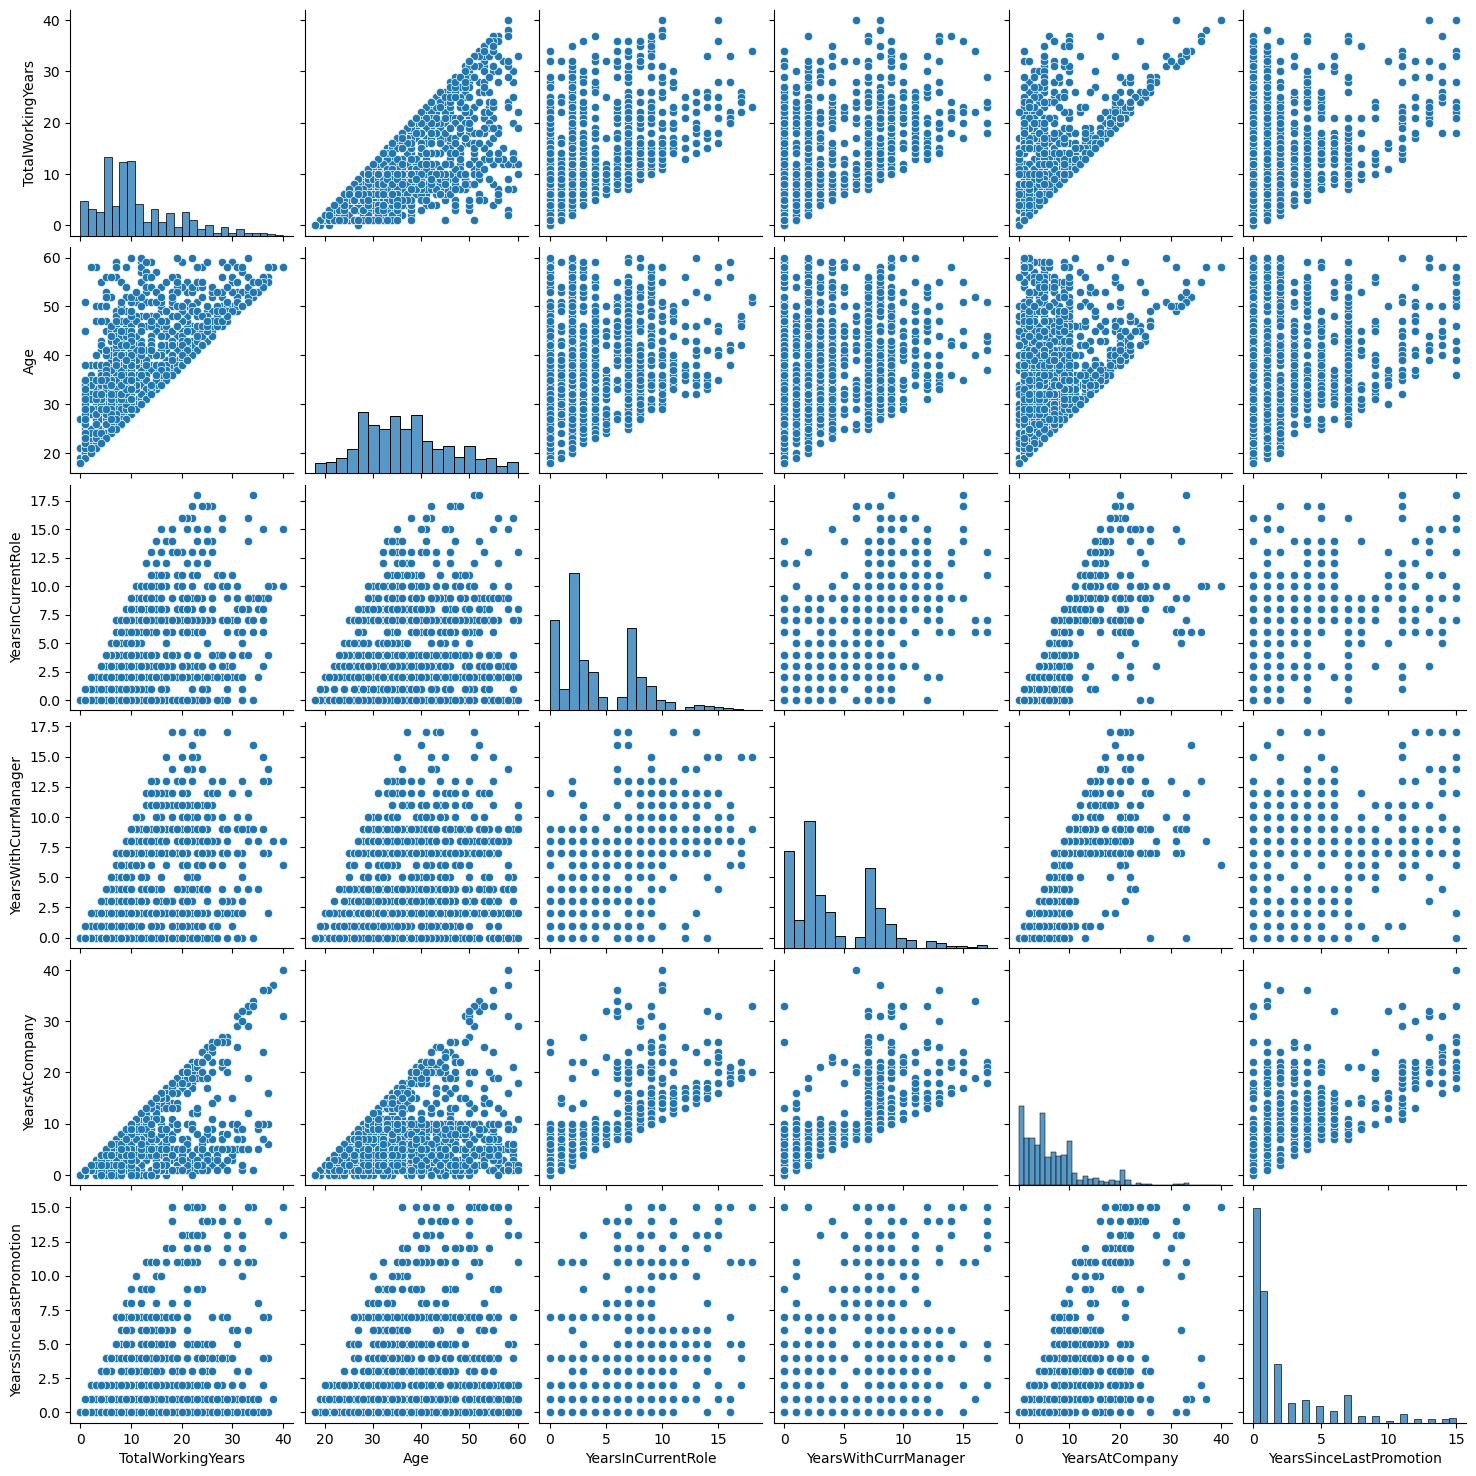

In [64]:
df_subset=df[['TotalWorkingYears', 'Age', 'YearsInCurrentRole', 'YearsWithCurrManager', 'YearsAtCompany', 'YearsSinceLastPromotion']]
sns.pairplot(df_subset)
plt.show() #using Matplotlib to show the plot

#### Explanation:
First I made another subset without the attrition column, because I want to know which column has the strongest correlation. With the .pairplot() function I made all these scatterplots. The diagonal is not relevant, because in that line all of the columns are compared with eachother, so the correlation is always 1. This pairplot gives you a general overview of which columns has the strongest correlation.

### Step 2.2: Use the corr function to show the correlation in numbers

In [65]:
corr = df_subset[["TotalWorkingYears","Age","YearsInCurrentRole","YearsWithCurrManager","YearsAtCompany","YearsSinceLastPromotion"]].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,TotalWorkingYears,Age,YearsInCurrentRole,YearsWithCurrManager,YearsAtCompany,YearsSinceLastPromotion
TotalWorkingYears,1.000000,0.680381,0.460365,0.459188,0.628133,0.404858
Age,0.680381,1.000000,0.212901,0.202089,0.311309,0.216513
YearsInCurrentRole,0.460365,0.212901,1.000000,0.714365,0.758754,0.548056
YearsWithCurrManager,0.459188,0.202089,0.714365,1.000000,0.769212,0.510224
YearsAtCompany,0.628133,0.311309,0.758754,0.769212,1.000000,0.618409
YearsSinceLastPromotion,0.404858,0.216513,0.548056,0.510224,0.618409,1.000000


#### Explanation:
With the corr function, Python will generate a table with the correlation values. Here you can see the same result shown with numbers as the pairplot above.

### Step 2.3: Make a heatmap to show the correlation even clearer

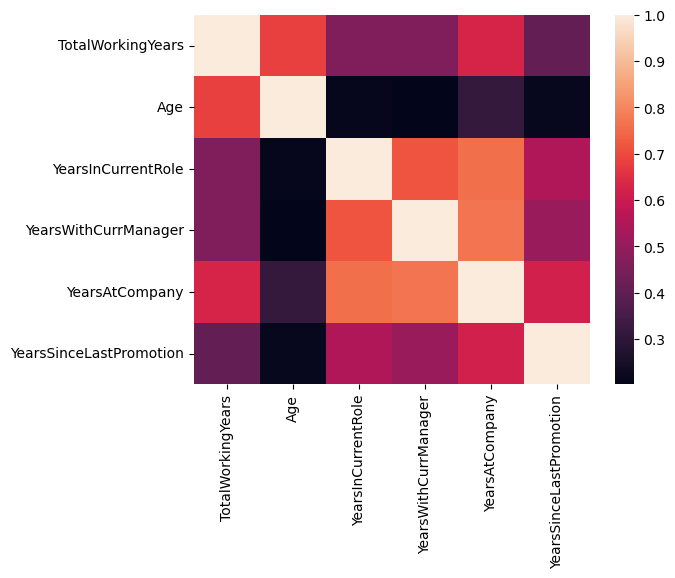

In [66]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

#### Explanation:
With the .heatmap() function, Python will generate a heatmap to show the correlation even clearer.

### Step 2.4: Make a scatterplot with the variables with the strongest correlation

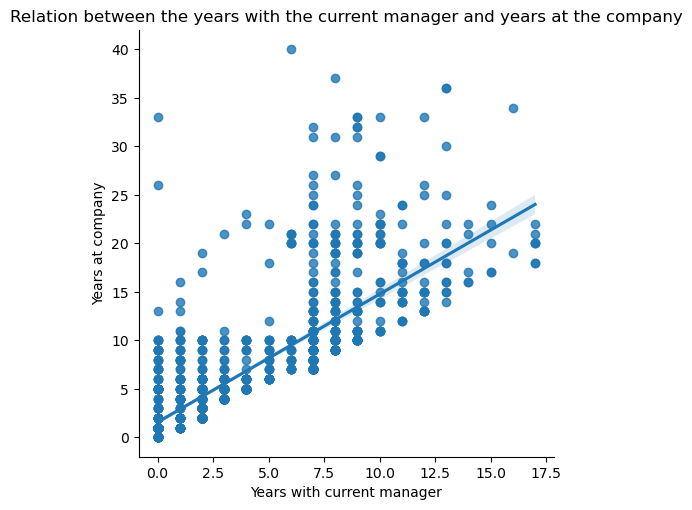

In [67]:
sns.lmplot(x='YearsWithCurrManager', y='YearsAtCompany', fit_reg=True, data=df_subset) #fit_reg=False leaves out the regression line
plt.xlabel('Years with current manager') #use matplotlib to refine Seaborn plot
plt.ylabel('Years at company')
plt.title('Relation between the years with the current manager and years at the company')
plt.show()

#### Explanation:
With the .lmplot() function, Python will generate a scatterplot to show the relation between the years with the current manager and years at the company. These two variables have the strongest correlation with each other as you can see in the pairplot, correlation matrix and heatmap.

## Step 3: Predictive model

### Step 3.1: Split the data to make a training and test set

In [68]:
X = df.loc[:,'TotalWorkingYears':'YearsSinceLastPromotion'] #create the X matrix
y = df['Attrition'] #create the y-variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,TotalWorkingYears,Age,YearsInCurrentRole,YearsAtCompany,YearsWithCurrManager,YearsSinceLastPromotion
99,17,44,2,3,2,1
785,14,40,10,11,1,11
918,31,51,10,29,10,11
1335,7,39,2,2,2,2
1182,4,36,2,3,2,1


#### Explanation:
With the train_test_split() function, Python will split the dataframe in a training set and a test set. The testsize is set to 30%, because this will give the model enough data to train and some data to test if the model is not overfitted.

### Step 3.2: Use the K-nearest neighbor algorithm

#### What is the k-nearest neighbor algorithm?
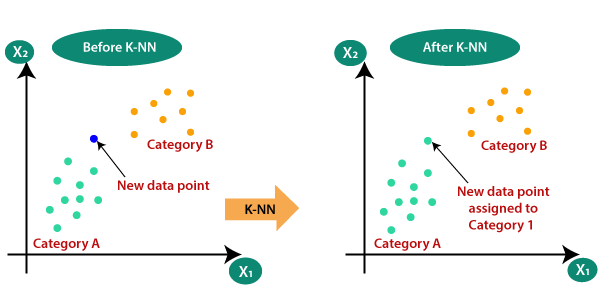
The k-nearest neighbor algorithm is a supervised algorithm that is used to classify datapoints. It will look at other datapoint nearby to determine in which class/cluster the datapoint needs to be (see figure above). This algorithm can easily place new data point in the right class, based on their position.

In [69]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors = 5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neighbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8253968253968254

#### Explanation:
First I imported the KNN classifier from the sklearn library. Then I created a knn-classifier with 5 neighbors. That is the default value for knn. After that I added the training set to the knn model. Lastly with the knn.score() function the score of the fit will be showed as a decimal value. This value needs to be multiplied with 100 to see the percentage. The higher the score, the better and more accurate. With this dataset the fit of he model is 82,5%. 

### Step 3.3: Create a confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
conf_matrix = pd.DataFrame(cm, index=['No attrition (actual)', 'Attrition (actual)'], columns = ['No attrition (predicted)', 'Attrition (predicted)']) #creates a dataframe of the confusion matrix to make it easer to read 
conf_matrix

D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,No attrition (predicted),Attrition (predicted)
No attrition (actual),12,65
Attrition (actual),12,352


#### Explanation:
First I imported the confusion_matrix from the sklearn library. Then i created the confusion matrix with the actual and predicted values. Lastly I put them in a dataframe to easily read them.

## Evaluation

### Calculate the accuracy with the confusion matrix

In [71]:
(12+352)/(12+12+65+352)

0.8253968253968254

### Generate a classification model to calculate the precision and recall

In [72]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.21      0.19      0.20        77
           1       0.83      0.84      0.84       364

    accuracy                           0.73       441
   macro avg       0.52      0.52      0.52       441
weighted avg       0.72      0.73      0.73       441

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.23      0.35      0.28        77
           1       0.85      0.75      0.79       364

    accuracy                           0.68       441
   macro avg       0.54      0.55      0.54       441
weighted avg       0.74      0.68      0.70       441

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.39      0.16      0.22        77
           1       0.84      0.95      0.89       364

    accuracy                           0.81       441
   macro avg       0.61      0.5

D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

With 5 neighbors the result is:
              precision    recall  f1-score   support

           0       0.50      0.16      0.24        77
           1       0.84      0.97      0.90       364

    accuracy                           0.83       441
   macro avg       0.67      0.56      0.57       441
weighted avg       0.78      0.83      0.79       441

With 6 neighbors the result is:
              precision    recall  f1-score   support

           0       0.41      0.19      0.26        77
           1       0.85      0.94      0.89       364

    accuracy                           0.81       441
   macro avg       0.63      0.57      0.58       441
weighted avg       0.77      0.81      0.78       441

With 7 neighbors the result is:
              precision    recall  f1-score   support

           0       0.61      0.14      0.23        77
           1       0.84      0.98      0.91       364

    accuracy                           0.83       441
   macro avg       0.73      0.5

D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

With 9 neighbors the result is:
              precision    recall  f1-score   support

           0       0.64      0.12      0.20        77
           1       0.84      0.99      0.91       364

    accuracy                           0.83       441
   macro avg       0.74      0.55      0.55       441
weighted avg       0.81      0.83      0.78       441

With 10 neighbors the result is:
              precision    recall  f1-score   support

           0       0.53      0.13      0.21        77
           1       0.84      0.98      0.90       364

    accuracy                           0.83       441
   macro avg       0.68      0.55      0.56       441
weighted avg       0.79      0.83      0.78       441



D:\Users\janve\Program_Files\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Results
The predictive model has a relatively high accuracy (83%) with 5 neighbors. It's not really important, because you want to know if a model is precise in only labeling the employee attrition and the ability to predict if the employee attritioned. The precision and recall are the highest with 9 neighbors. The precision is 84% and the recall 99%. This makes the model usable to predict the employee attrition. The precision could be higher, but it's not bad at all.

## Conclusion

The variables in the dataset had some correlation with each other, but the strongest was only 0.76. If there were more variables with a stronger correlation, the predictive model would have a higher accuracy, precision and recall. Also if you would add more variables to the X-matrix, the model would perform better. Overall the results are pretty good, given that the input was not the best. 